In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sys

import numpy as np

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.visualization import make_lupton_rgb
from astropy.utils.data import download_file, clear_download_cache

import matplotlib.pyplot as plt

## Generate RGB 3-Color Picture

* Here we demonstrate how to use `unagi` to generate pretty picture of HSC object in a few lines of codes.

### Step 1: Setup HSC-SSP online data archive 

* First, you need to setup a HSC-SSP rerun
* Here we use the ultra-deep field from the `PDR2` as an example

In [2]:
from unagi import config
from unagi import hsc
from unagi.task import hsc_tricolor

pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_dud')

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/pdr2_dud/pdr2_dud_tables.fits


### Step 2: Design the cutout region

* **Central coordinate** should be passed as a `SkyCoord` object in `astropy`
* Right now, we only allow square-shape cutout, but it will be updated to allow any rectangular region.
* **Size of the image** should be a `Quantity` object in `astropy`. It should have a **unit**, either angular or physical one is fine
    - For angular size: `u.arcsec` is default. 
    - For physical size: `u.kpc` is default, and you need to provide the `redshift` of the object. 
    - To convert physical size into pixel unit, we also need to assume cosmology. You can define cosmology model using the `cosmology` module in `astropy` and pass it to the code using `cosmo` option.  Default one assumes `H0=70.` and `Om=0.3` `LambdaCDMFlat` cosmology
* **Filters** used to generate the picture. Default is `gri`
    - `[HSC-G, HSC-R, HSC-I]` also works. 
    - We assume the order of filters is in ascending order of the central wavelength.  
    - If you order the filters in "RGB" channel order, please set `rgb_order=True`.

In [3]:
coord = SkyCoord(150.09134, 2.205916, frame='icrs', unit='deg')

# Angular size
s_ang = 15.0 * u.arcsec

# Physical size
s_phy = 100.0 * u.kpc
redshift = 0.25

# Filters
filters = 'gri'

### Step 3. Running the `hsc_tricolor` task

* What will happen is that `unagi` will try to download the cutout images in three bands, then generate 3-color picture using the famous `Lupton` approach used in SDSS.  
    - It will only download the `image` layer of HSC coadd data, ignore the `variance` and `mask` layers. 
* *HSC archive*: 
    - You can decide which database to use using `dr` and `rerun` parameter. 
    - You can also directly pass the `rerun` object to the script using `archive=` option. This is faster.
* *Save the FITS image*: you may want to save the three-band images in FITS format for later use. 
    - Set `save_img=True`
    - Please provide the directory and the prefix of file name in `prefix`. The default one will save the data in the current folder, and name the file using the `rerun`, central coordinate, and image size information. 
    - If you want to generate a slightly different color picture using the same **saved FITS images**, set `use_saved=True`.
* *Save the JPEG picture*: if you want to save a copy of the color picture, set `save_rgb=True`. 
    - Otherwise you can get the RBG image cube and the WCS information of the cutout from the output.
* *Adjust the picture*: the look of the 3-color image is constrained by three parameters: 
    - `rgb_q`: The asinh softening parameter. Default: 15
    - `rgb_stretch`: The linear stretch of the image. Default: 0.5
    - `rgb_minimum`: Intensity that should be mapped to black (a scalar or array for R, G, B). Default: 0.
    - Please see [here](http://docs.astropy.org/en/stable/api/astropy.visualization.make_lupton_rgb.html) for more informaiton

In [4]:
# Use angular size and don't save the data
cutout_rgb, cutout_wcs = hsc_tricolor(
    coord, cutout_size=s_ang, filters=filters, verbose=True, 
    save_rgb=False, save_img=False, use_saved=False, archive=pdr2)

# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


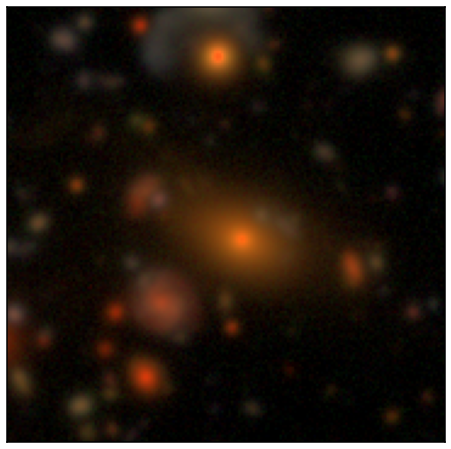

In [5]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# Use physical size and saved the data
cutout_rgb, cutout_wcs = hsc_tricolor(
    coord, cutout_size=s_phy, redshift=redshift, filters=filters, verbose=True, 
    save_rgb=False, save_img=True, use_saved=False, archive=pdr2)

# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


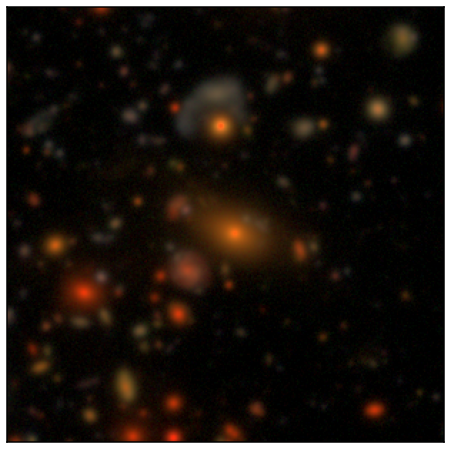

In [7]:
fig = plt.subplots(figsize=(8,8))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()

### Demo figure

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/s20a_dud/s20a_dud_tables.fits
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


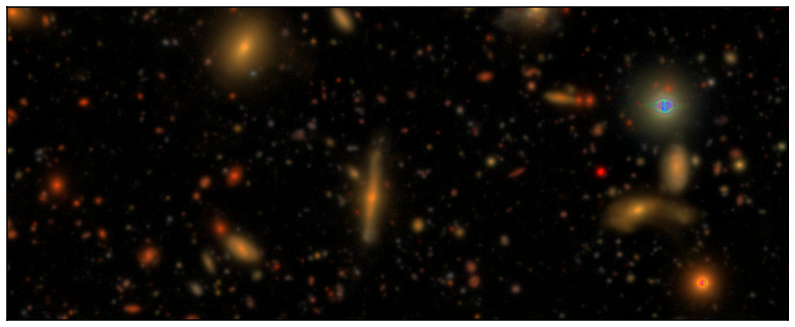

In [9]:
#pdr2 = hsc.Hsc(dr='pdr2', rerun='pdr2_dud')
pdr2 = hsc.Hsc(dr='dr3', rerun='s20a_dud')

coord_1 = SkyCoord(150.09134, 2.205916, frame='icrs', unit='deg')
coord_2 = SkyCoord(150.04134, 2.185916, frame='icrs', unit='deg')

cutout_rgb, cutout_wcs = hsc_tricolor(
    coord_1, coord_2=coord_2, filters='gri', verbose=True, 
    save_rgb=False, save_img=False, use_saved=False, archive=pdr2)

fig = plt.subplots(figsize=(14, 6))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()

### Three line demo

In [9]:
from unagi import hsc, task
from astropy.coordinates import SkyCoord

cutout_rgb, cutout_wcs = task.hsc_tricolor(
    SkyCoord(150.09134, 2.205916, frame='icrs', unit='deg'), cutout_size=15.0 * u.arcsec, 
    filters='gri', verbose=True, save_rgb=False, save_img=False, use_saved=False, 
    archive=hsc.Hsc(dr='pdr2', rerun='pdr2_wide'))

# Get table list from /Users/song/Dropbox/work/project/unagi/unagi/data/pdr2_wide/pdr2_wide_tables.fits
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i


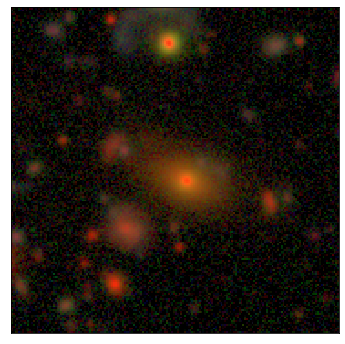

In [10]:
fig = plt.subplots(figsize=(14, 6))
plt.imshow(cutout_rgb, origin='lower')
plt.xticks([])
plt.yticks([])
plt.show()